<a href="https://colab.research.google.com/github/abdul-rohman-lab/classification-images-Object-Detection-TensorFlow./blob/main/classification_images_%26_Object_Detection_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library Python untuk manipulasi gambar.
!pip install pillow

In [ ]:
# Untuk mengakses Mengakses model MobileNetv2
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [ ]:
# Import library yang diperlukan
import tensorflow as tf                      # Untuk model dan prediksi
import numpy as np                           # Untuk operasi numerik
from PIL import Image, ImageOps              # Untuk memproses gambar
import matplotlib.pyplot as plt              # Untuk menampilkan gambar
from google.colab import files               # Untuk mengunggah file di Google Colab

In [ ]:
# Fungsi untuk memuat model MobileNetV2 dengan bobot pre-trained dari ImageNet
def load_model():
    model = tf.keras.applications.MobileNetV2(weights='imagenet')
    return model

In [ ]:
# Fungsi untuk melakukan preprocessing gambar
def preprocess_image(image):
    # Ubah ukuran gambar menjadi 224x224 piksel sesuai dengan input model MobileNetV2
    image = image.resize((224, 224))
    # Ubah gambar menjadi array numpy
    image_array = np.array(image)
    # Pastikan gambar memiliki 3 channel (RGB); jika ada channel alpha (RGBA), buang channel tersebut
    if image_array.shape[-1] == 4:
        image_array = image_array[..., :3]
    # Lakukan preprocessing sesuai dengan MobileNetV2
    processed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
    # Tambahkan dimensi batch: dari (224,224,3) menjadi (1,224,224,3)
    processed_image = np.expand_dims(processed_image, axis=0)
    return processed_image

In [ ]:
# Memuat model
model = load_model()
print("Model MobileNetV2 berhasil dimuat.")

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model MobileNetV2 berhasil dimuat.


Silakan unggah gambar (format: jpg, jpeg, atau png):


Saving African_Bush_Elephant.jpg to African_Bush_Elephant.jpg


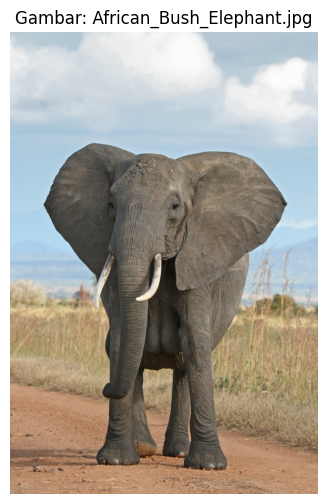

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
### Hasil Prediksi untuk African_Bush_Elephant.jpg ###
1. African_elephant: 55.31%
2. tusker: 31.32%
3. Indian_elephant: 2.92%


In [ ]:
# Mengunggah gambar menggunakan widget Google Colab
print("Silakan unggah gambar (format: jpg, jpeg, atau png):")
uploaded = files.upload()

# Proses setiap file yang diunggah
for filename in uploaded.keys():
    # Membaca gambar dengan PIL
    image = Image.open(filename)

    # Menampilkan gambar yang diunggah
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Gambar: {filename}")
    plt.axis('off')
    plt.show()

    # Melakukan preprocessing gambar
    processed_image = preprocess_image(image)

    # Melakukan prediksi menggunakan model
    predictions = model.predict(processed_image)

    # Mendecode prediksi untuk mendapatkan label dan probabilitas (top 3)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=3)[0]

    # Menampilkan hasil prediksi
    print(f"### Hasil Prediksi untuk {filename} ###")
    for i, (imagenetID, label, prob) in enumerate(decoded_predictions):
        print(f"{i+1}. {label}: {prob*100:.2f}%")


In [ ]:
!pip install ultralytics

## Load yolo model

### Subtask:
Load a pre-trained YOLO model (e.g., YOLOv8n for a lightweight option).


**Reasoning**:
Import the YOLO class and load the pre-trained YOLOv8n model weights.



In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('yolov8n.pt')
print("YOLOv8n model loaded successfully.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 77.7MB/s]

YOLOv8n model loaded successfully.


## Upload and process image

### Subtask:
Allow the user to upload an image and prepare it for the YOLO model.


**Reasoning**:
Print a message to the user, use `files.upload()` to get the uploaded file, retrieve the filename, and open the image using PIL.



In [ ]:
print("Please upload an image (formats: jpg, jpeg, or png):")
uploaded = files.upload()

# Assuming only one file is uploaded for simplicity
filename = next(iter(uploaded))

# Open the uploaded image file
image = Image.open(filename)

print(f"Image '{filename}' uploaded and opened successfully.")

Please upload an image (formats: jpg, jpeg, or png):


Saving African_Bush_Elephant.jpg to African_Bush_Elephant (2).jpg
Image 'African_Bush_Elephant (2).jpg' uploaded and opened successfully.


## Perform object detection

### Subtask:
Use the loaded YOLO model to perform object detection on the uploaded image.


**Reasoning**:
Use the loaded YOLO model to perform object detection on the uploaded image.



In [ ]:
# Perform object detection on the image
results = model.predict(image)
print("Object detection performed successfully.")


0: 640x448 1 elephant, 68.9ms
Speed: 3.4ms preprocess, 68.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)
Object detection performed successfully.


## Visualize results

### Subtask:
Display the original image with the detected objects, including bounding boxes and labels.


**Reasoning**:
Access the first result, get the annotated image, convert it to a PIL Image, and display it using matplotlib with a title and without axis labels.



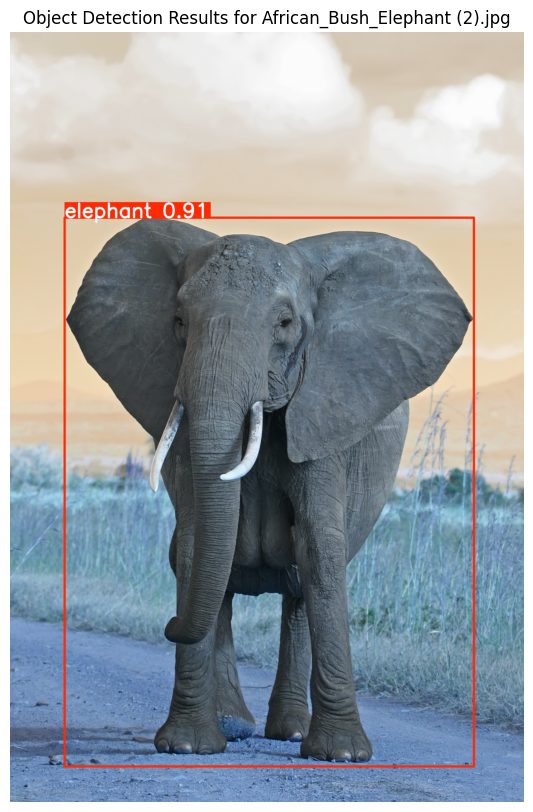

In [ ]:
# Access the first result
result = results[0]

# Get the annotated image as a NumPy array
annotated_image_array = result.plot()

# Convert the annotated image from a NumPy array to a PIL Image object
annotated_image_pil = Image.fromarray(annotated_image_array)

# Display the PIL Image object
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image_pil)
plt.title(f"Object Detection Results for {filename}")
plt.axis('off')
plt.show()